# process_a1

Notebook for converting L-arm raw data into a1 product, including fixing typos and removing accidental measurements.

@author: David Clemens-Sewall

In [1]:
# Imports
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from larm import read_spectrum_file, read_paired_spectra, convert_00_to_a1

%matplotlib inline

In [2]:
# Paths and naming_variables
data_path = os.path.join('..', '..', 'data', 'whoi_l_arm_transmittance')
prefix = 'contrasts_l_arm_'

## r1a

2025-07-10T11:11:16
2025-07-10T11:24:26


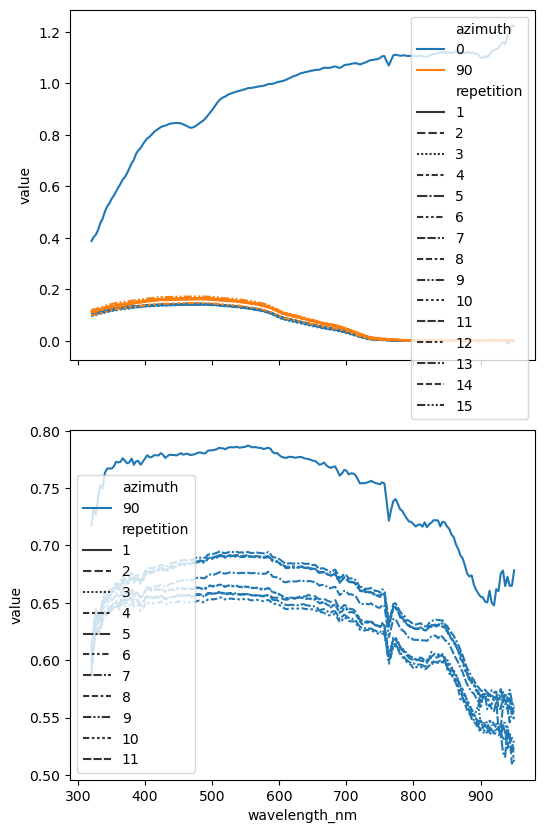

In [54]:
project_name = '20250710-r1-coring'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

<Axes: xlabel='wavelength_nm', ylabel='value'>

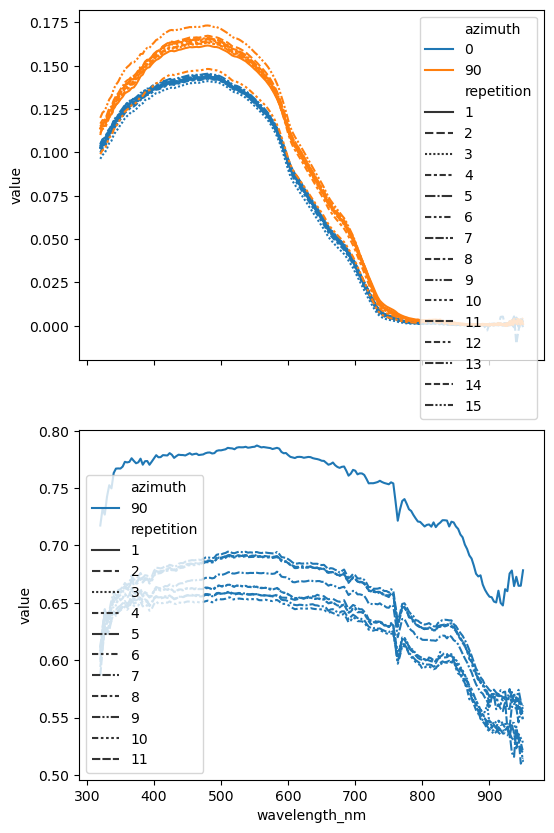

In [55]:
# remove transmittance repetition 1 from az0
# that measurement was made before the sensor was underwater.
ts_error = df_a1.xs(('0', 1, 'T'), level=('azimuth', 'repetition', 'type')
                   ).index.get_level_values('timestamp_utc').unique()
df_a1 = df_a1.query('timestamp_utc not in @ts_error')

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])

In [56]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-10T15:05:48
2025-07-10T15:46:12


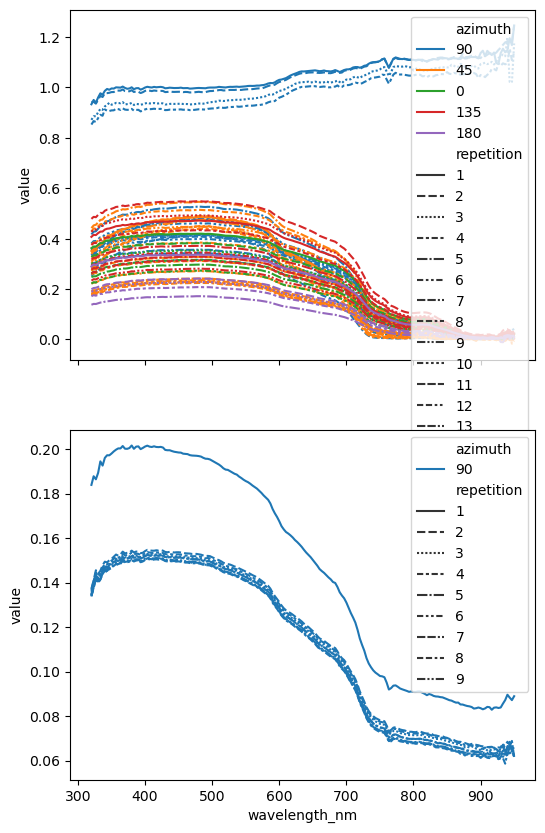

In [57]:
project_name = '20250710-r1-ocn_pond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

<Axes: xlabel='wavelength_nm', ylabel='value'>

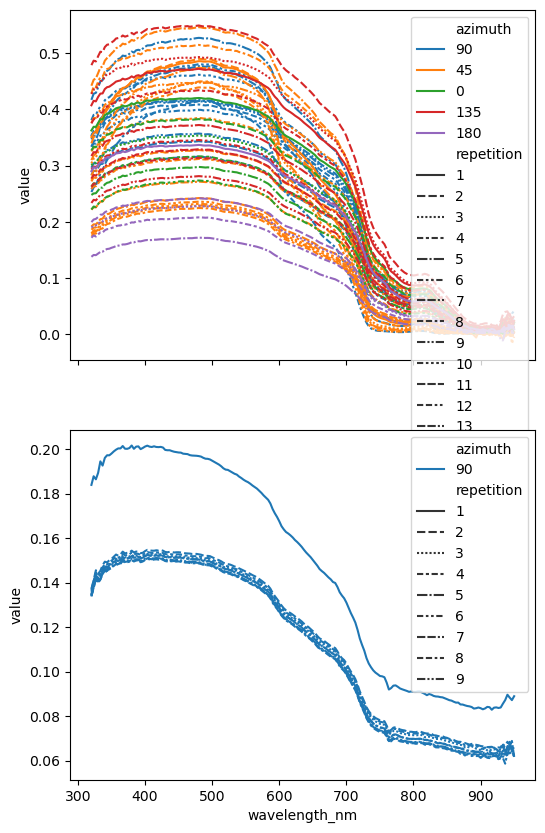

In [58]:
# remove transmittance repetition 1 from az0
# that measurement was made before the sensor was underwater.
ts_error = df_a1.query('variable == "Transmittance" & value >= 0.8'
                   ).index.get_level_values('timestamp_utc').unique()
df_a1 = df_a1.query('timestamp_utc not in @ts_error')

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])

In [59]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-12T10:36:27
2025-07-12T11:02:34


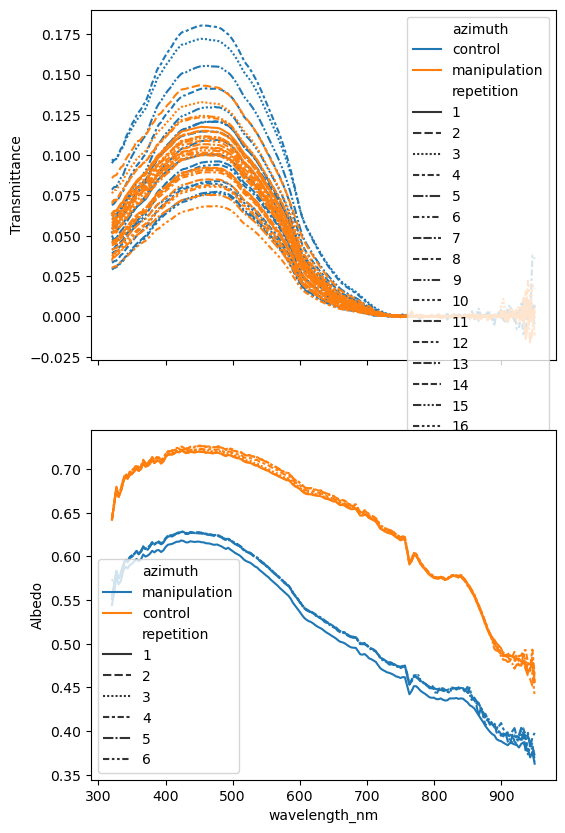

In [60]:
project_name = '20250712-r1-ssl'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')
# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [61]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

## r2a

2025-07-15T10:20:04
2025-07-15T10:51:47


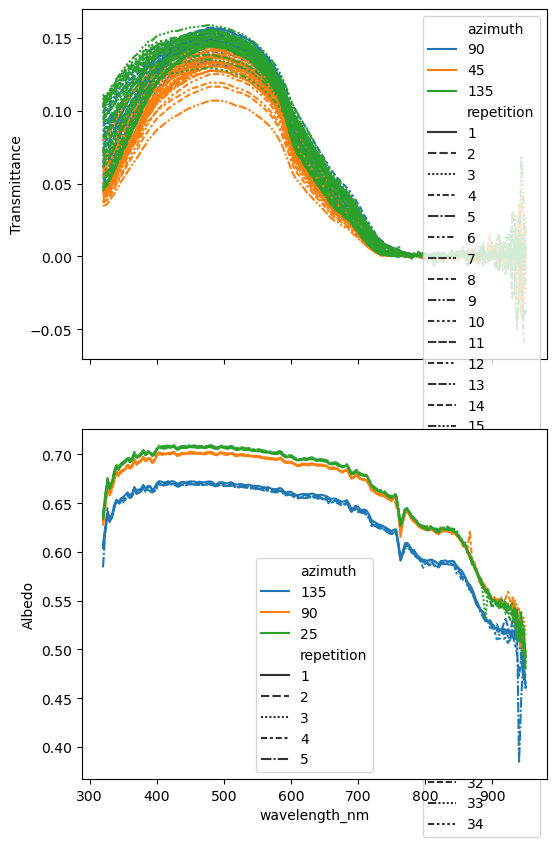

In [14]:
project_name = '20250715-r2-coring'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')
# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

Text(0, 0.5, 'Albedo')

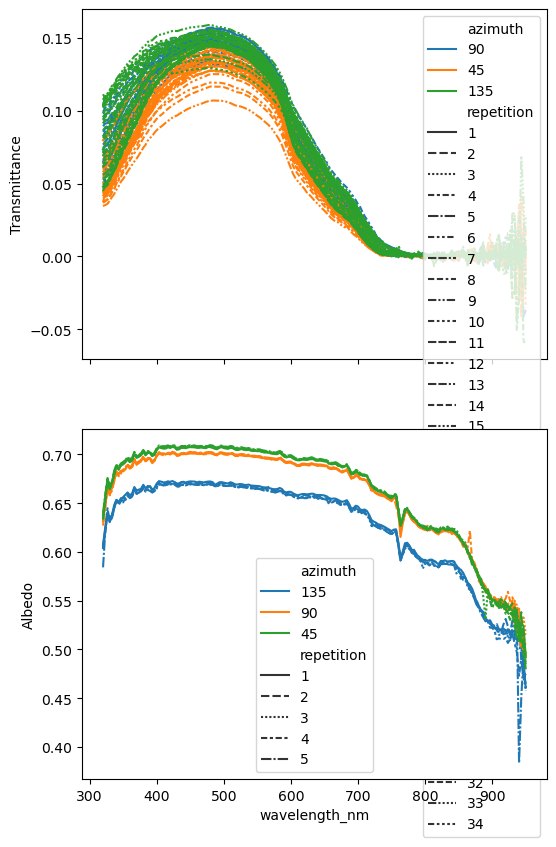

In [15]:
# Fix typo in albedo azimuth
df_temp = df_a1.query('azimuth == "25"').reset_index()
df_temp['azimuth'] = "45"
df_temp = df_temp.set_index(['timestamp_utc', 'station', 'location', 'azimuth', 
                             'type','depth', 'repetition', 'wavelength_nm', 'variable'])
df_a1 = pd.concat([df_a1.query('azimuth != "25"'), df_temp])

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [16]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-15T16:34:34
2025-07-15T16:36:13


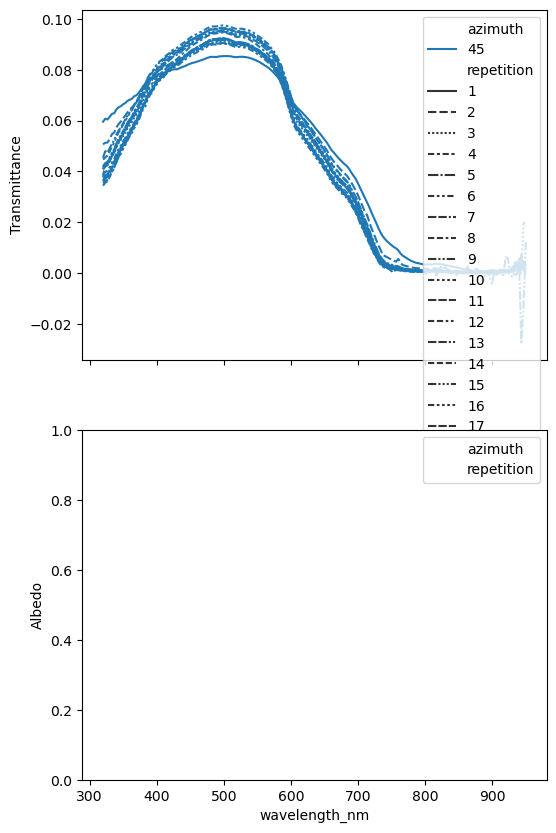

In [64]:
project_name = '20250715-r2-lead5'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')
# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [65]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-15T16:22:13
2025-07-15T16:30:04


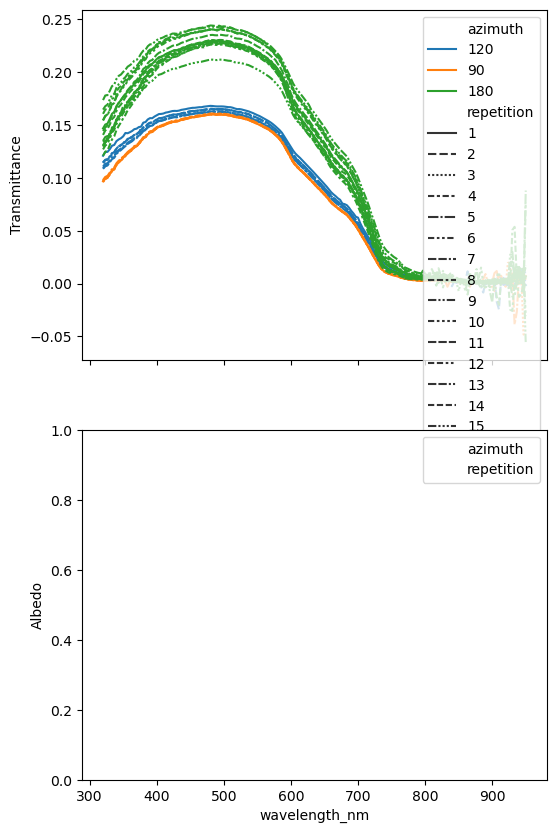

In [66]:
project_name = '20250715-r2-lead20'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')
# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [67]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-16T15:58:36
2025-07-16T16:10:33


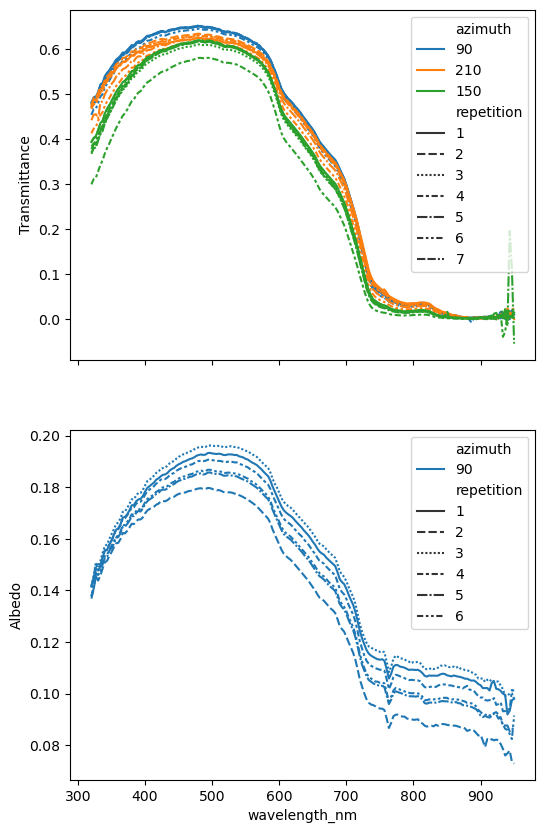

In [68]:
project_name = '20250716-r2-CKNpond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')
# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [69]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-16T14:21:48
2025-07-16T14:44:03


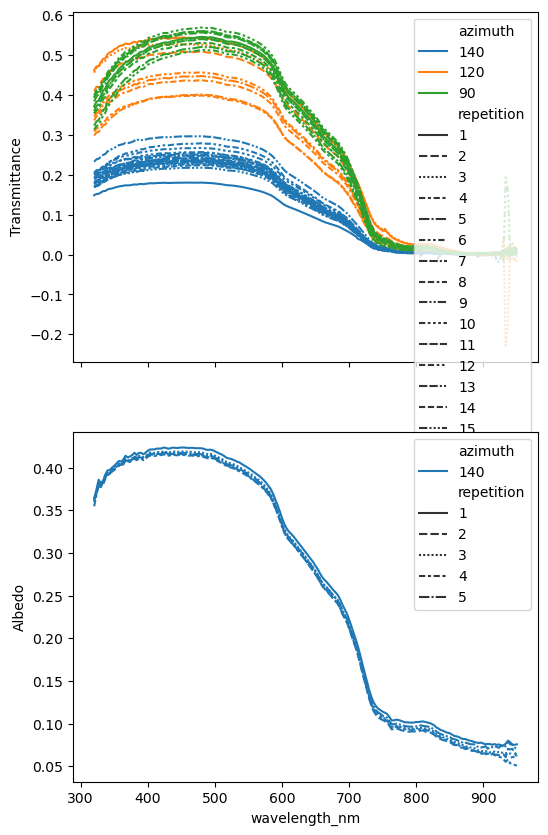

In [70]:
project_name = '20250716-r2-NEpond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')
# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [71]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-16T14:24:01
2025-07-16T15:06:46


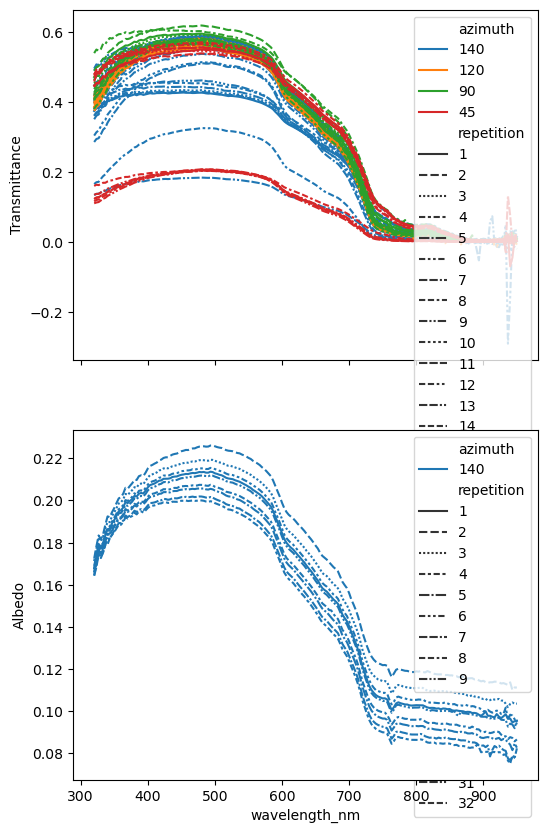

In [75]:
project_name = '20250716-r2-Spond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

Text(0, 0.5, 'Albedo')

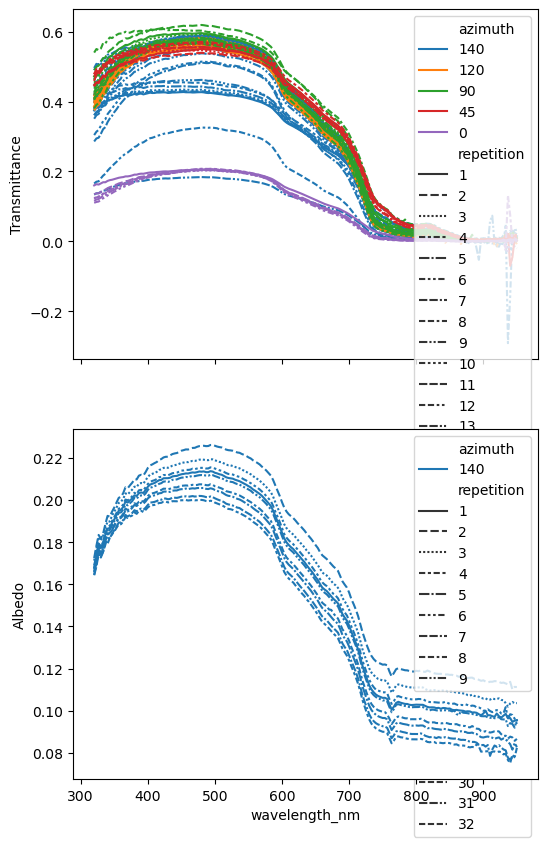

In [76]:
ts_error = df_a1.query('azimuth == "45" & wavelength_nm == 320 & variable == "Transmittance" ' +
           '& timestamp_utc >= "2025-07-16 15:03:30+00:00"'
           ).index.get_level_values('timestamp_utc').unique()

df_temp = df_a1.loc[ts_error].reset_index()
df_temp['repetition'] = df_temp['repetition'] - 7
df_temp['azimuth'] = "0"
df_temp = df_temp.set_index(['timestamp_utc', 'station', 'location', 'azimuth', 'type',
                            'depth', 'repetition', 'wavelength_nm', 'variable'])

df_a1 = df_a1.query('timestamp_utc not in @ts_error')
df_a1 = pd.concat([df_a1, df_temp])

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [77]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-16T15:50:14
2025-07-16T16:13:51


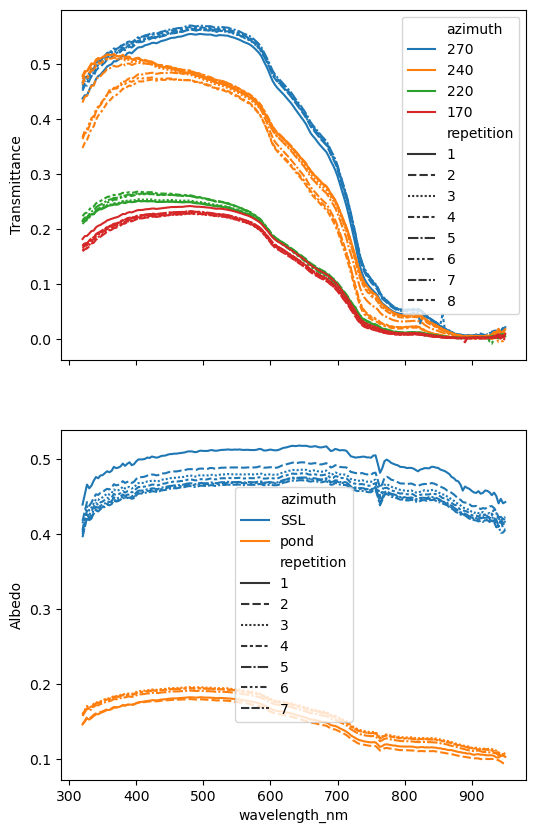

In [3]:
project_name = '20250716-r2-SNpond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

Text(0, 0.5, 'Albedo')

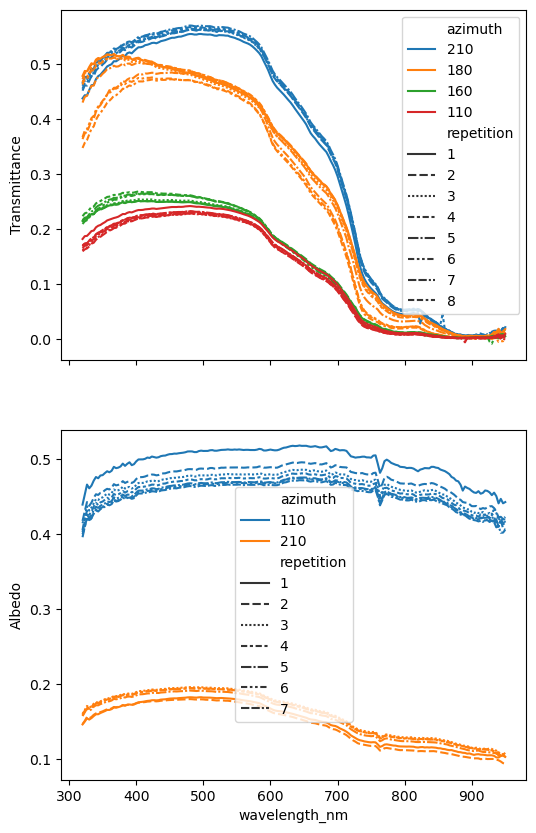

In [12]:
# Azimuths are all 60 degrees too large and albedo azimuths need to be set properly
df_T = df_a1.query('azimuth in ["170", "220", "240", "270"]').reset_index()
df_T['azimuth'] = (pd.to_numeric(df_T['azimuth']) - 60).astype('string')

df_A = df_a1.query('azimuth in ["SSL", "pond"]').reset_index()
df_A.loc[df_A.azimuth=='SSL', 'azimuth'] = "110"
df_A.loc[df_A.azimuth=='pond', 'azimuth'] = "210"

df_a1 = pd.concat([df_T, df_A]).set_index(['timestamp_utc', 'station', 'location', 
                                           'azimuth', 'type','depth', 'repetition', 
                                           'wavelength_nm', 'variable'])

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [13]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

## r3a

2025-07-20T10:44:22
2025-07-20T11:09:26


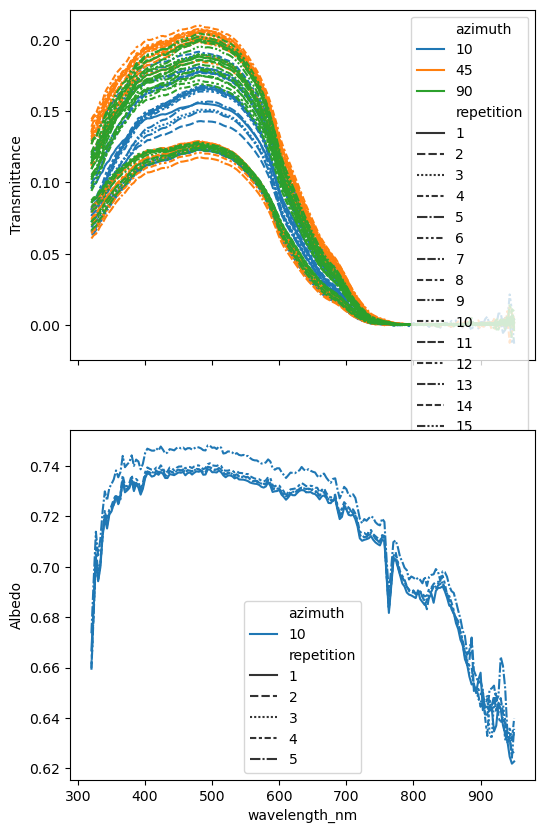

In [17]:
project_name = '20250720-r3-coring'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [18]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-20T14:03:39
2025-07-20T14:25:18


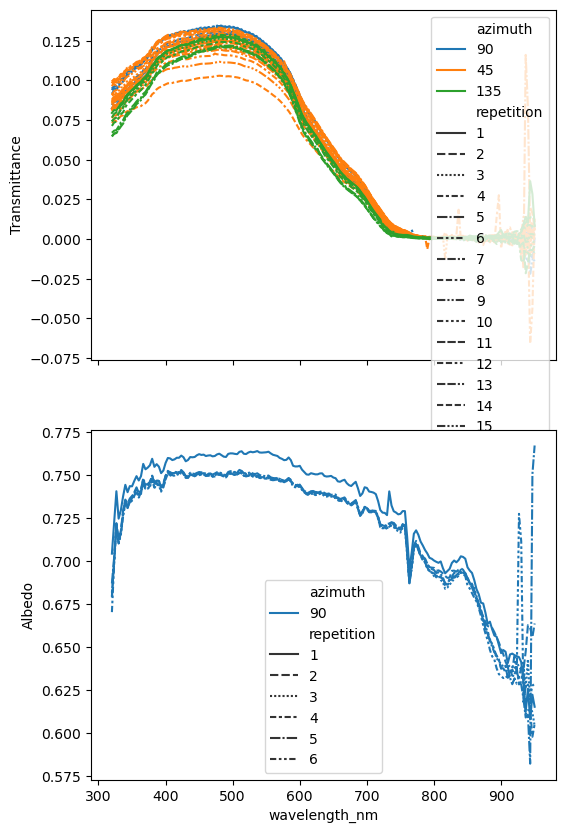

In [19]:
project_name = '20250720-r3-lead_far'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [20]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

C:\Users\dcsewall\Desktop\whoi_contrasts\code\l_arm_processing\larm.py:208: UserWarning: Missing Transmitted or Reflected from ..\..\data\whoi_l_arm_transmittance\20250720-r3-lead_close\00\contrasts_4A7F_2025-07-20_14-31-31_493_613_SAM_881D_SPECTRUM_CALIBRATED.dat..\..\data\whoi_l_arm_transmittance\20250720-r3-lead_close\00\contrasts_4A7F_2025-07-20_14-31-31_493_610_SAM_881E_SPECTRUM_CALIBRATED.dat
  warnings.warn('Missing Transmitted or Reflected from ' + fp_1 + fp_2)
C:\Users\dcsewall\Desktop\whoi_contrasts\code\l_arm_processing\larm.py:208: UserWarning: Missing Transmitted or Reflected from ..\..\data\whoi_l_arm_transmittance\20250720-r3-lead_close\00\contrasts_4A7F_2025-07-20_14-42-31_654_692_SAM_881E_SPECTRUM_CALIBRATED.dat..\..\data\whoi_l_arm_transmittance\20250720-r3-lead_close\00\contrasts_4A7F_2025-07-20_14-42-31_654_688_SAM_881D_SPECTRUM_CALIBRATED.dat
  warnings.warn('Missing Transmitted or Reflected from ' + fp_1 + fp_2)
C:\Users\dcsewall\Desktop\whoi_contrasts\code\l_arm_

2025-07-20T14:06:39
2025-07-20T14:37:43


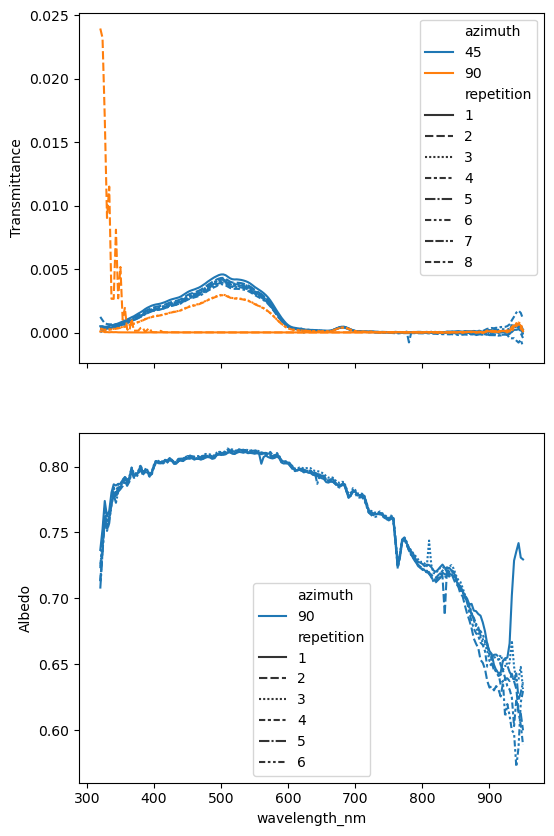

In [4]:
project_name = '20250720-r3-lead_close'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [5]:
# The 'Transmittance' data collected here was not valid, the sensor must have been hanging
# vertically downwards. So we can remove all transmittance data
df_a1 = df_a1.query('type == "A"')

In [6]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-21T15:25:56
2025-07-21T15:43:06


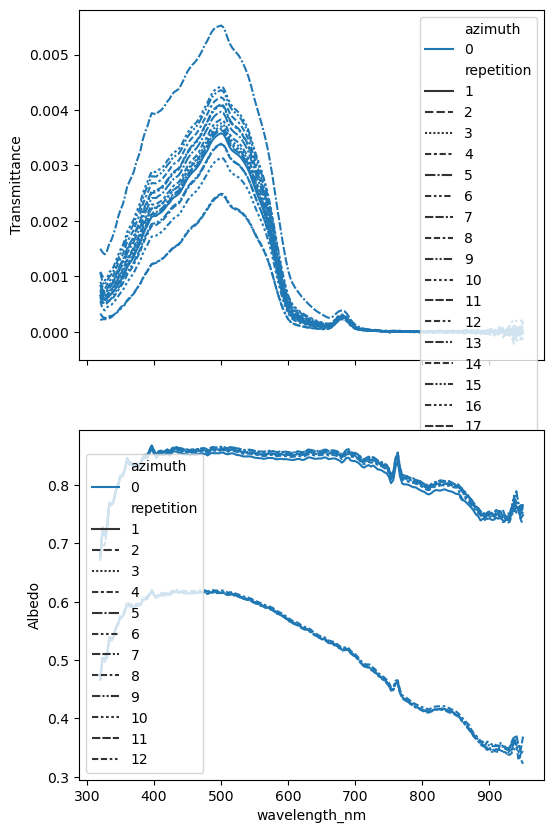

In [7]:
project_name = '20250721-r3-ssl'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [8]:
# The 'Transmittance' data collected here was not valid, the sensor must have been hanging
# vertically downwards. So we can remove all transmittance data
df_a1 = df_a1.query('type == "A"')

Text(0, 0.5, 'Albedo')

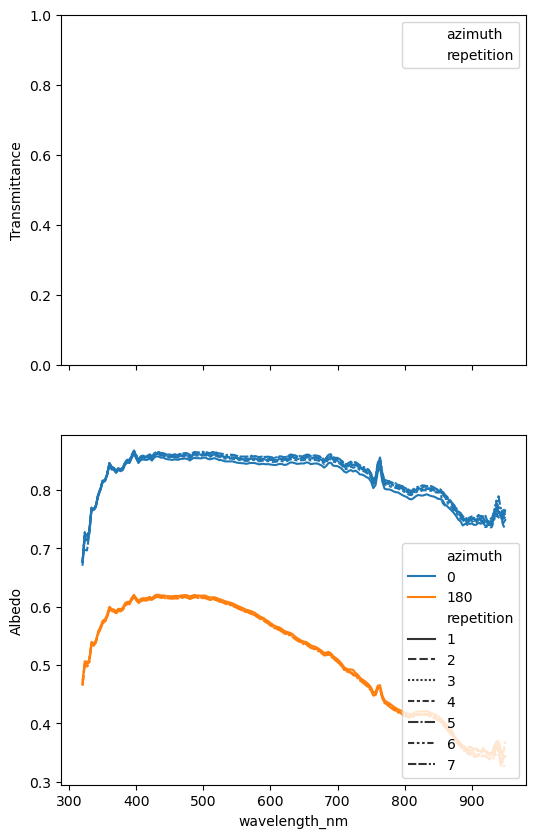

In [11]:
# Separately, the azimuth was not changed in the comments between the pristine and SSL
# manipulated areas
ts_error = df_a1.query('timestamp_utc >= "2025-07-21 15:27:00+00:00"'
           ).index.get_level_values('timestamp_utc').unique()

df_temp = df_a1.loc[ts_error].reset_index()
df_temp['repetition'] = df_temp['repetition'] - 7
df_temp['azimuth'] = "180"
df_temp = df_temp.set_index(['timestamp_utc', 'station', 'location', 'azimuth', 'type',
                            'depth', 'repetition', 'wavelength_nm', 'variable'])

df_a1 = df_a1.query('timestamp_utc not in @ts_error')
df_a1 = pd.concat([df_a1, df_temp])

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [12]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-22T14:26:32
2025-07-22T14:26:53


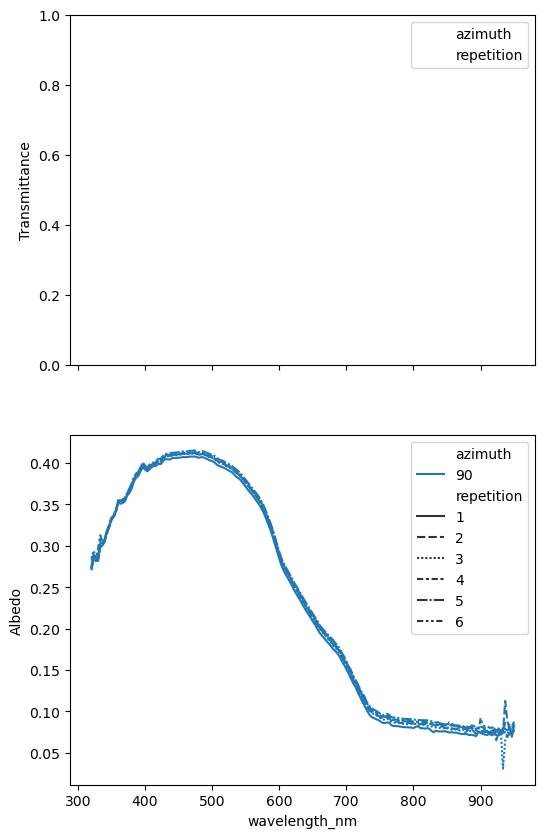

In [13]:
project_name = '20250722-r3-bluepond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [14]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-22T14:28:18
2025-07-22T14:28:52


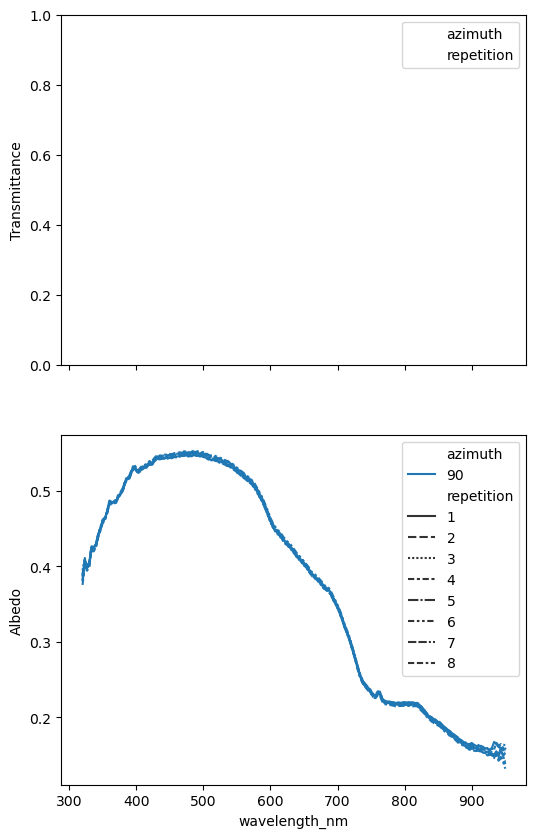

In [15]:
project_name = '20250722-r3-lightbluepond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [16]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

## r1b

2025-07-26T10:34:31
2025-07-26T10:48:46


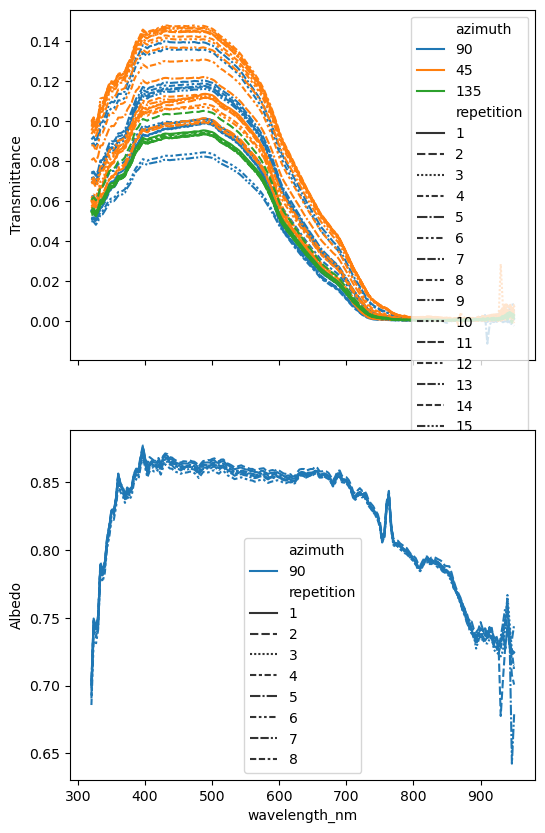

In [17]:
project_name = '20250726-r1-coring'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [18]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-26T13:41:45
2025-07-26T14:04:26


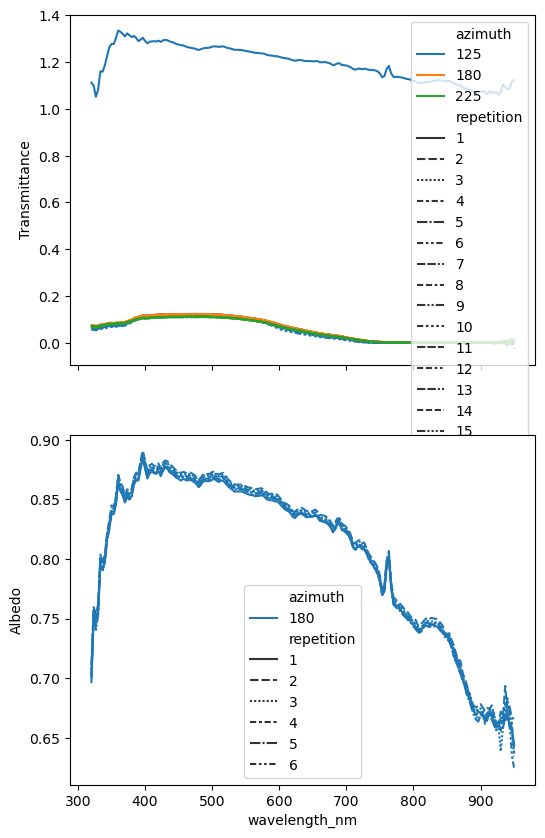

In [19]:
project_name = '20250726-r1-lead_far'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

Text(0, 0.5, 'Albedo')

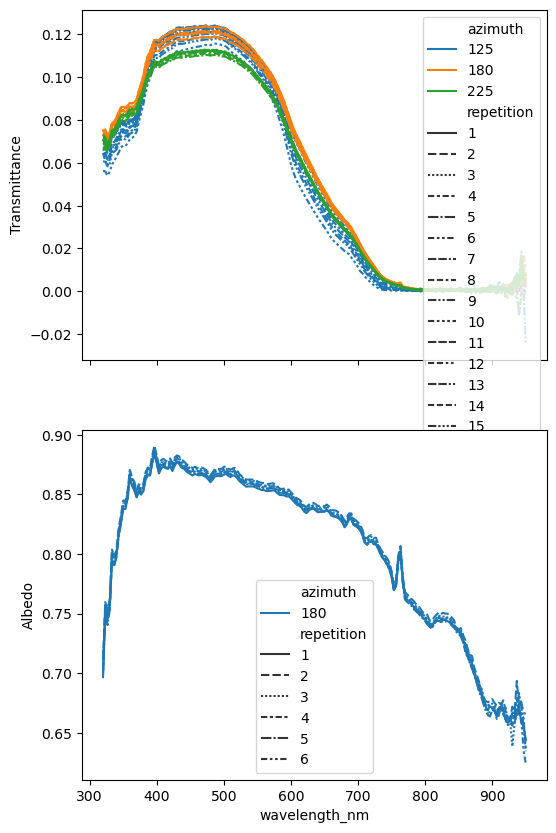

In [22]:
# Remove the erroneous spectrum
ts_error = df_a1.query('variable == "Transmittance" & value >= 1.0'
           ).index.get_level_values('timestamp_utc').unique()

df_a1 = df_a1.query('timestamp_utc not in @ts_error')

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [23]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-26T14:40:49
2025-07-26T14:53:09


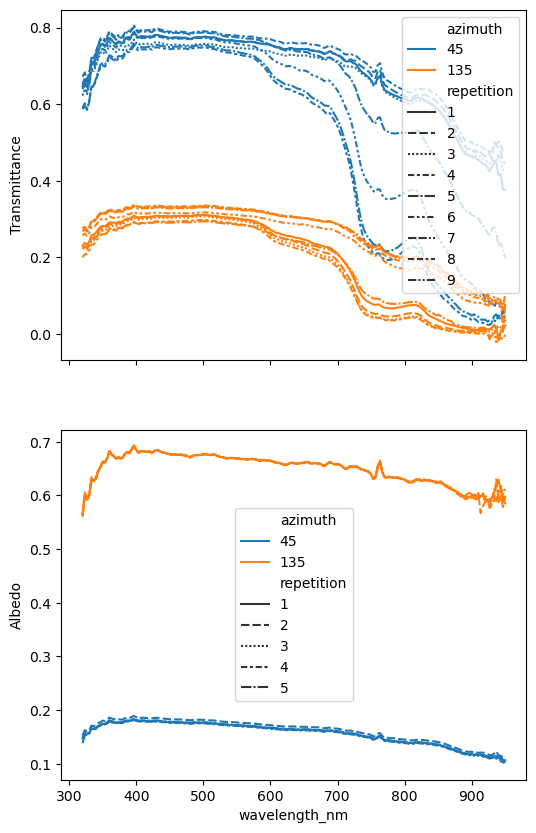

In [24]:
project_name = '20250726-r1-lead_close'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [25]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-27T16:11:02
2025-07-27T16:13:32


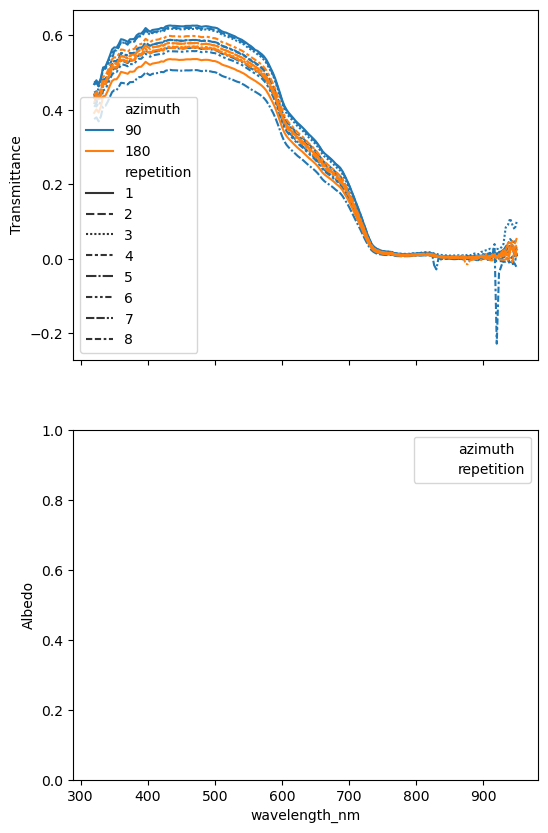

In [26]:
project_name = '20250727-r1-sharedpondeast'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [27]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-27T16:20:28
2025-07-27T16:24:09


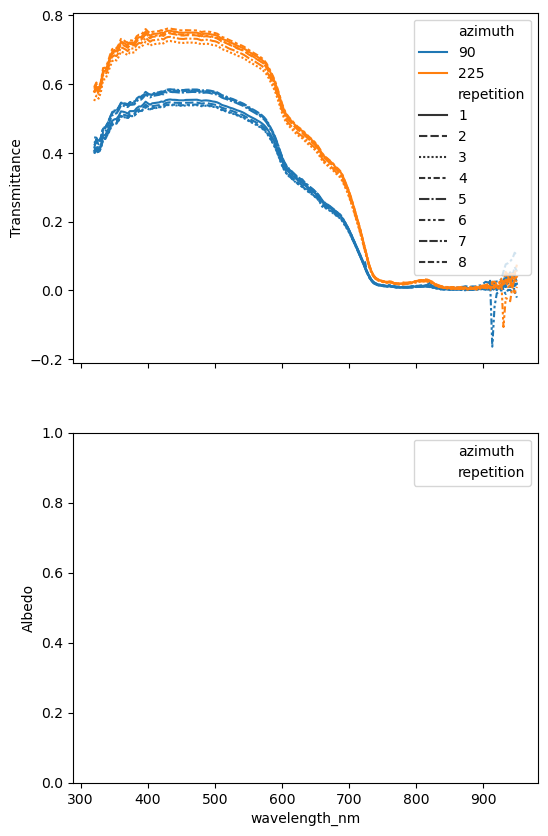

In [28]:
project_name = '20250727-r1-sharedpondmiddle'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [29]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-27T16:29:49
2025-07-27T16:34:07


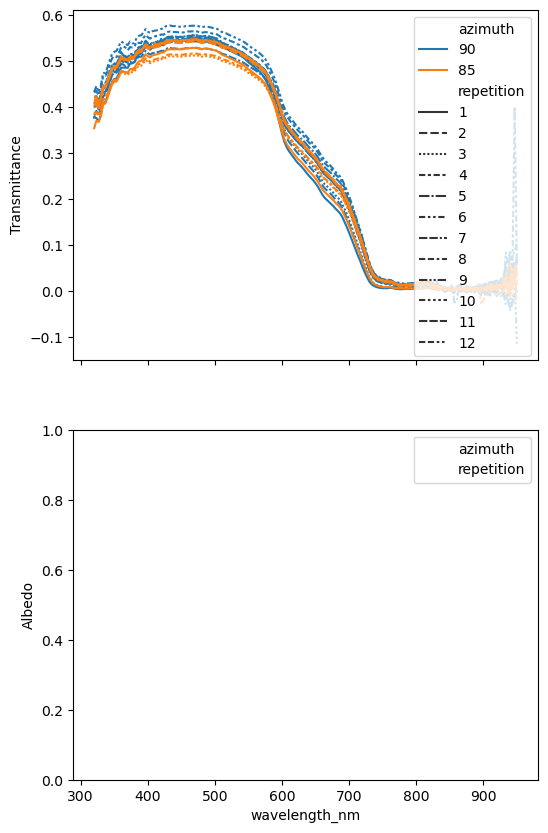

In [30]:
project_name = '20250727-r1-sharedpondwest'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

Text(0, 0.5, 'Albedo')

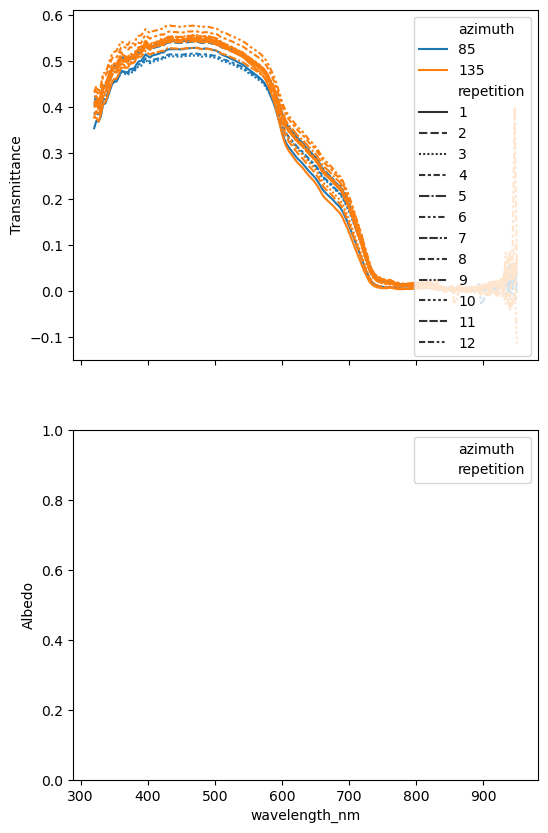

In [31]:
# Fix typo in albedo azimuth
df_temp = df_a1.query('azimuth == "90"').reset_index()
df_temp['azimuth'] = "135"
df_temp = df_temp.set_index(['timestamp_utc', 'station', 'location', 'azimuth', 
                             'type','depth', 'repetition', 'wavelength_nm', 'variable'])
df_a1 = pd.concat([df_a1.query('azimuth != "90"'), df_temp])

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [32]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-30T10:44:21
2025-07-30T11:00:22


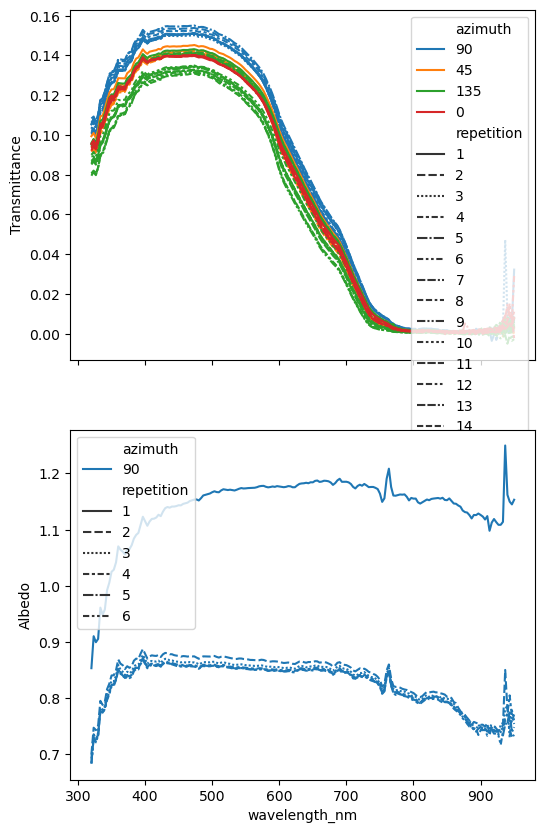

In [3]:
project_name = '20250730-r2-coring'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

Text(0, 0.5, 'Albedo')

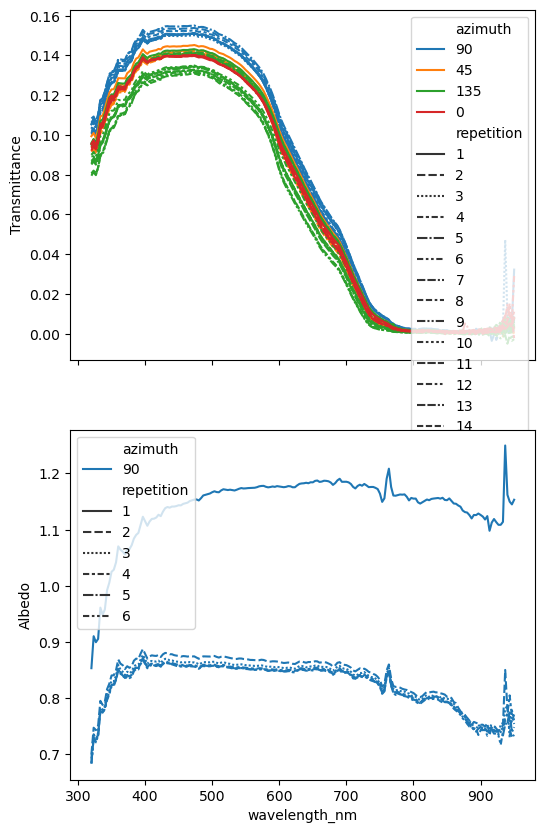

In [4]:
# Remove the erroneous spectrum
ts_error = df_a1.query('variable == "Transmittance" & value >= 1.0'
           ).index.get_level_values('timestamp_utc').unique()

df_a1 = df_a1.query('timestamp_utc not in @ts_error')

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [5]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-30T15:08:45
2025-07-30T16:08:30


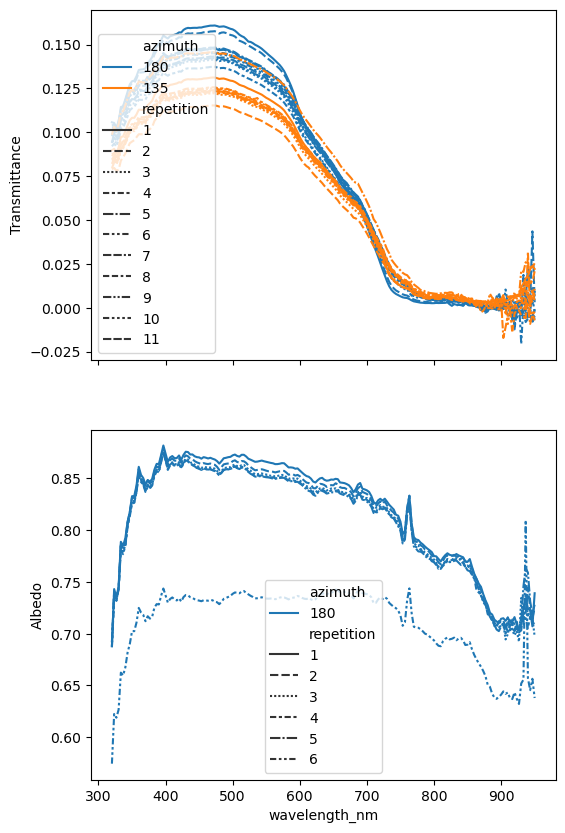

In [7]:
project_name = '20250730-r2-lead50'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [8]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-30T15:12:35
2025-07-30T15:54:35


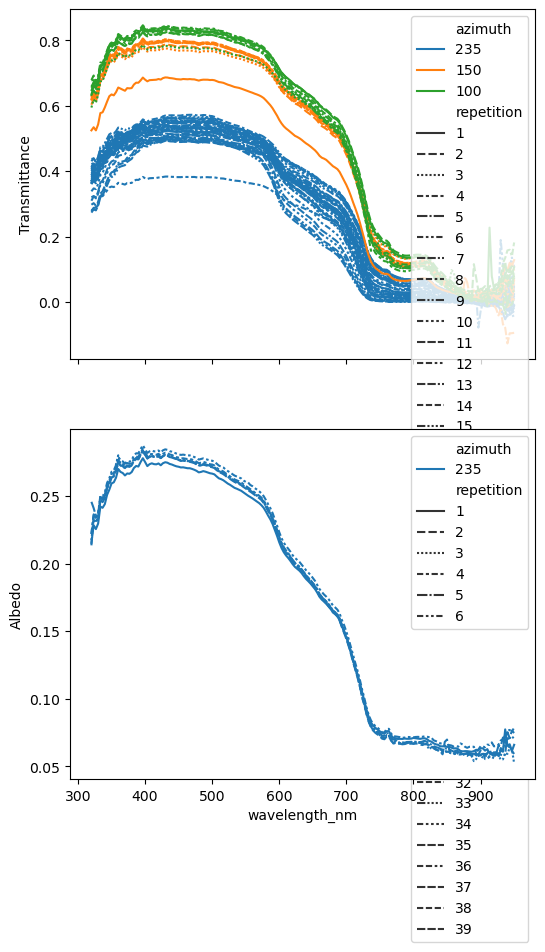

In [9]:
project_name = '20250730-r2-NEpond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [10]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-30T15:15:53
2025-07-30T15:35:07


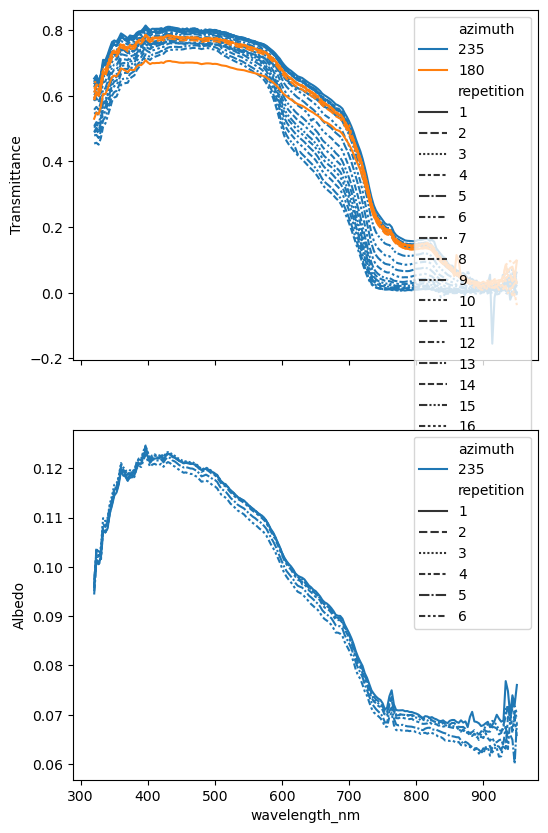

In [11]:
project_name = '20250730-r2-Spond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [12]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-30T16:30:14
2025-07-30T17:08:17


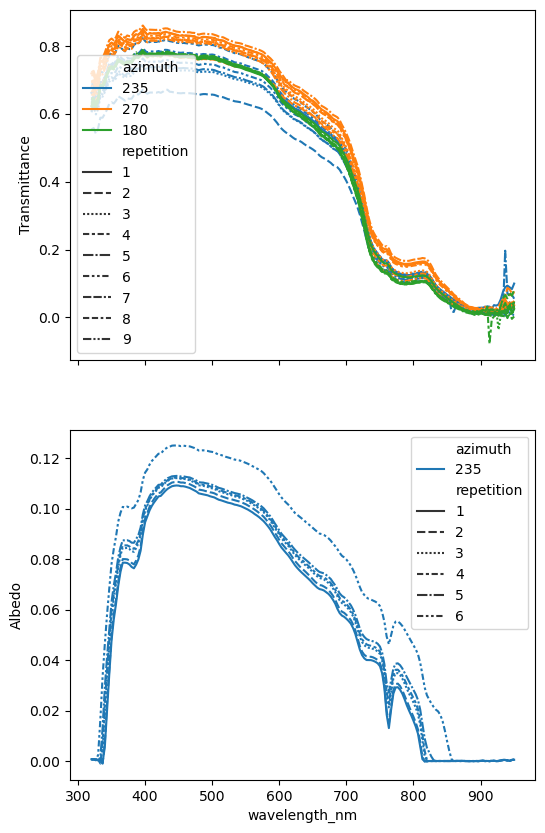

In [15]:
project_name = '20250730-r2-CKNpond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [16]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-30T16:38:09
2025-07-30T17:10:02


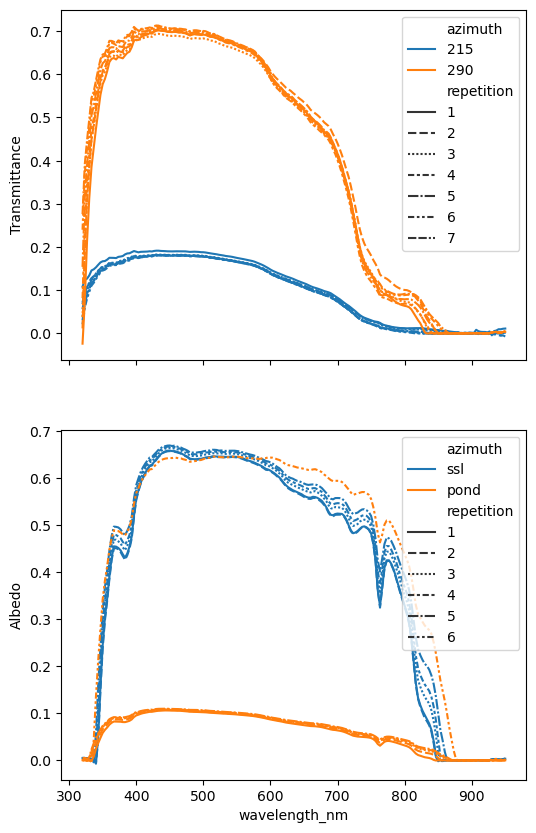

In [12]:
project_name = '20250730-r2-SNpond'
df_a1 = convert_00_to_a1(data_path, project_name)

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

Text(0, 0.5, 'Albedo')

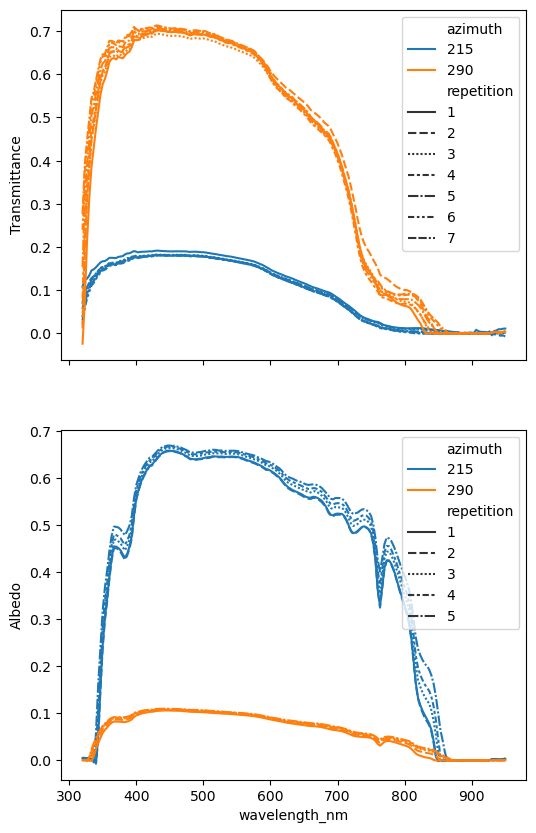

In [13]:
# albedo azimuths need to be set properly
df_A = df_a1.query('azimuth in ["ssl", "pond"]').reset_index()
df_A.loc[df_A.azimuth=='ssl', 'azimuth'] = "215"
df_A.loc[df_A.azimuth=='pond', 'azimuth'] = "290"
df_A = df_A.set_index(['timestamp_utc', 'station', 'location', 'azimuth', 'type',
                       'depth', 'repetition', 'wavelength_nm', 'variable'])

df_a1 = pd.concat([df_a1.query('azimuth not in ["ssl", "pond"]'), df_A])

# and azimuth pond/290 repetition 6 is clearly not a ponded surface
ts_error = df_a1.query('azimuth == "290" & repetition == 6 & type == "A"'
                      ).index.get_level_values('timestamp_utc').unique()[0]
df_a1 = df_a1.query('timestamp_utc != @ts_error')

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [14]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-07-30T13:52:18
2025-07-30T14:14:56


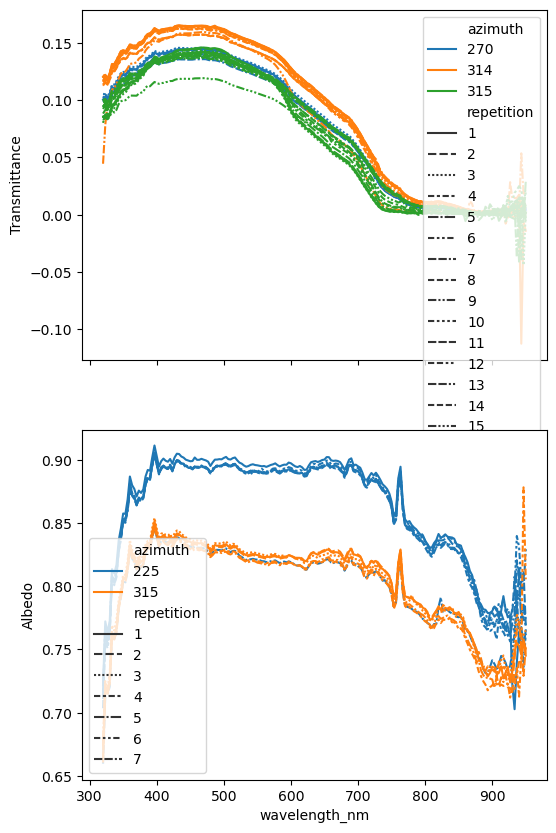

In [3]:
project_name = '20250730-r2-ssl'
df_a1 = convert_00_to_a1(data_path, project_name, matching='time')

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

<Axes: xlabel='wavelength_nm', ylabel='value'>

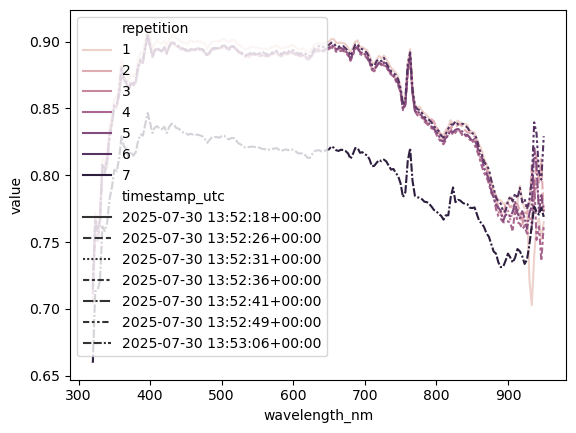

In [6]:
sns.lineplot(x='wavelength_nm', y='value', hue='repetition', style='timestamp_utc', 
             data=df_a1.query('variable=="Albedo" & type=="A" & azimuth=="225"'))

Text(0, 0.5, 'Albedo')

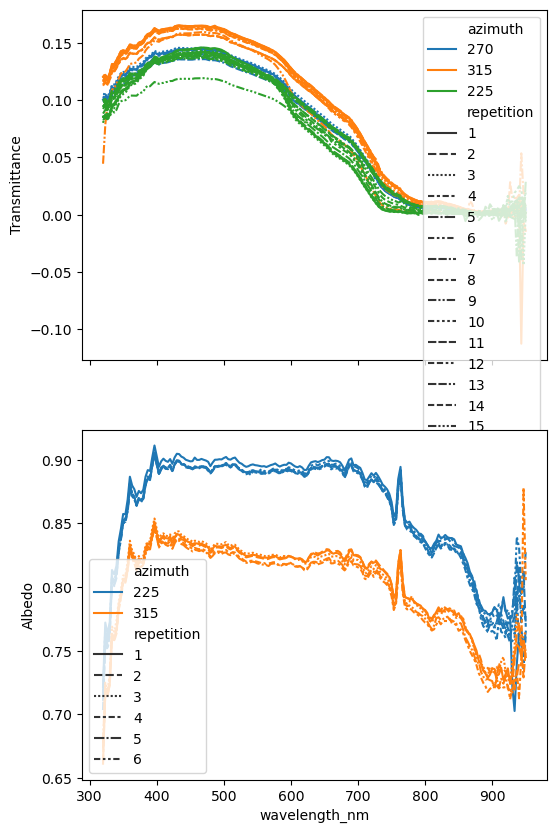

In [7]:
# Transmittance azimuths need to be set properly
df_T = df_a1.query('azimuth in ["314", "315"] & type == "T"').reset_index()
df_T.loc[df_T.azimuth=='315', 'azimuth'] = "225"
df_T.loc[df_T.azimuth=='314', 'azimuth'] = "315"
df_T = df_T.set_index(['timestamp_utc', 'station', 'location', 'azimuth', 'type',
                       'depth', 'repetition', 'wavelength_nm', 'variable'])
ts_error = df_T.index.get_level_values('timestamp_utc').unique()
df_a1 = pd.concat([df_a1.query('timestamp_utc not in @ts_error'), df_T])

# and albedo measurement at 2025-07-30 13:53:06+00:00 was over other surface probably
ts_error = '2025-07-30 13:53:06+00:00'
df_a1 = df_a1.query('timestamp_utc != @ts_error')

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

In [8]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1

2025-08-04T10:37:26
2025-08-04T10:46:07


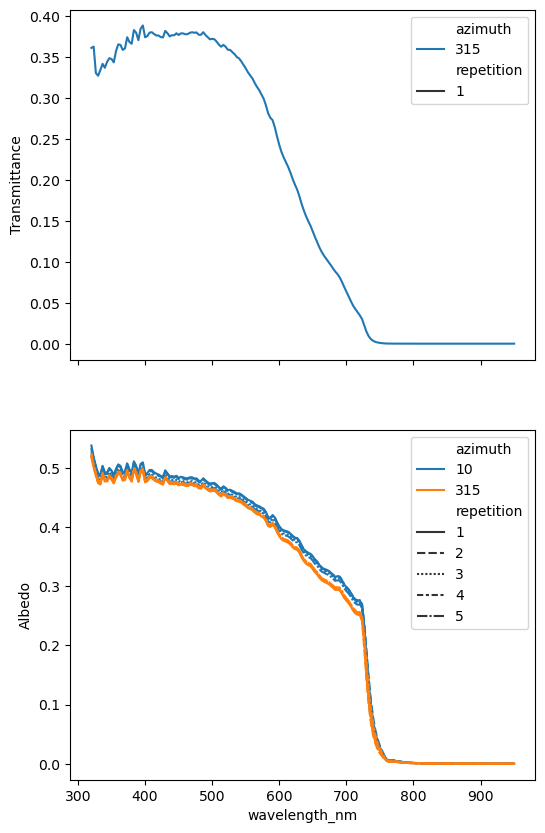

In [3]:
project_name = '20250804-r3-coring'
df_a1 = convert_00_to_a1(data_path, project_name, matching='time')

# Plot spectra
f, axs = plt.subplots(2, 1, sharex=True, figsize=(6,10))

sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Transmittance" & type=="T"'),
            ax=axs[0])
axs[0].set_ylabel('Transmittance')
sns.lineplot(x='wavelength_nm', y='value', hue='azimuth', style='repetition', 
             data=df_a1.query('variable=="Albedo" & type=="A"'),
            ax=axs[1])
axs[1].set_ylabel('Albedo')

# print start and end time
print(df_a1.index.get_level_values('timestamp_utc').min().strftime('%Y-%m-%dT%H:%M:%S'))
print(df_a1.index.get_level_values('timestamp_utc').max().strftime('%Y-%m-%dT%H:%M:%S'))

In [4]:
# Save a1
filepath = os.path.join(data_path, project_name,
                       prefix + project_name + '.a1.h5')
df_a1.to_hdf(filepath, key='data', mode='w', format='table',
             complevel=9, complib='blosc:lz4')

del df_a1